In [4]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [6]:
# Path to dataset: structured as "dataset/A/A1.jpg", "dataset/B/B2.jpg", etc.
DATASET_PATH = r"C:\Users\rbecc\OneDrive\Documents\GitHub\asl_dataset\asl_dataset"
IMAGE_SIZE = (100, 100)

def load_images_and_labels(dataset_path):
    X = []
    y = []
    failed_to_load_count = 0 # Initialize a counter for failed images
    total_images_processed = 0 # Initialize a counter for all images attempted

    for label in sorted(os.listdir(dataset_path)):
        label_path = os.path.join(dataset_path, label)
        if not os.path.isdir(label_path):
            continue
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            total_images_processed += 1 # Increment total images count

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Warning: Could not load image {img_path}. Skipping.")
                failed_to_load_count += 1 # Increment failed count
                continue
            img = cv2.resize(img, IMAGE_SIZE)
            edges = cv2.Canny(img, 100, 200)
            X.append(edges.flatten())
            y.append(label)

    print(f"\n--- Image Loading Summary ---")
    print(f"Total images attempted to load: {total_images_processed}")
    print(f"Successfully loaded images: {total_images_processed - failed_to_load_count}")
    print(f"Images failed to load: {failed_to_load_count}")
    print(f"-----------------------------")

    return np.array(X), np.array(y)

# Load data
print("Loading images...")
X, y = load_images_and_labels(DATASET_PATH)

print(f"Finished loading. Loaded {len(X)} images with labels.")
if len(X) == 0:
    print("No images were successfully loaded. Please check your DATASET_PATH and image files.")

Loading images...

--- Image Loading Summary ---
Total images attempted to load: 1815
Successfully loaded images: 1815
Images failed to load: 0
-----------------------------
Finished loading. Loaded 1815 images with labels.


Performing Elbow Method for KNN...


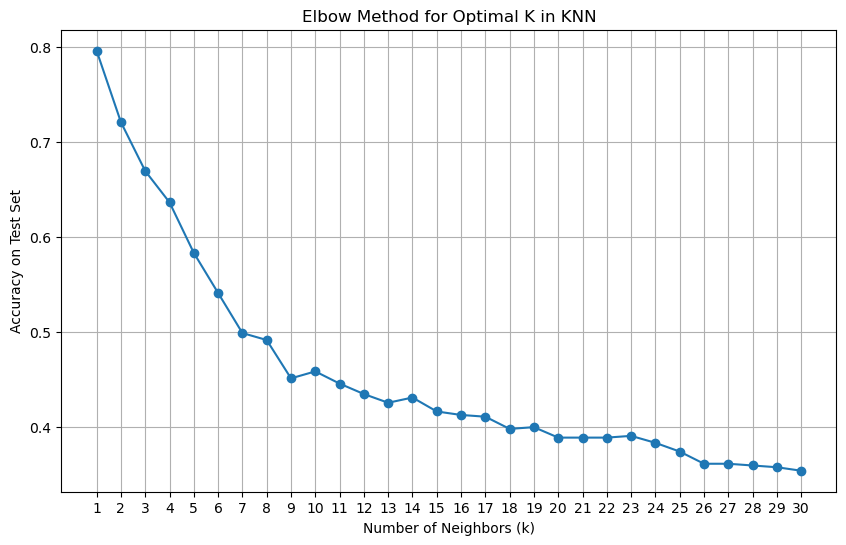


Based on the plot, a good choice for k might be around 1 (highest accuracy found).

Training KNN classifier with optimal k = 1...
Final KNN Classifier Test Accuracy with k=1: 0.7963


In [8]:
# The elbow test can tell us how many neighbors is the optimal number. Look at the graph and choose a k that is where the graph starts to flatten.

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lists to store accuracy for different k values
k_values = range(1, 31)  # Test k from 1 to 30
accuracies = []

print("Performing Elbow Method for KNN...")
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)  # Calculate accuracy on the test set
    accuracies.append(accuracy)
    #print(f"k = {k}, Accuracy = {accuracy:.4f}")

# Plotting the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy on Test Set')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# After visualizing the plot, you would choose the k where the accuracy gain starts to flatten out.
# For demonstration, let's say we choose the k with the highest accuracy from our tested range.
optimal_k_index = accuracies.index(max(accuracies))
optimal_k = k_values[optimal_k_index]
print(f"\nBased on the plot, a good choice for k might be around {optimal_k} (highest accuracy found).")

# Train KNN classifier with the chosen k
print(f"\nTraining KNN classifier with optimal k = {optimal_k}...")
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
final_accuracy = knn.score(X_test, y_test)
print(f"Final KNN Classifier Test Accuracy with k={optimal_k}: {final_accuracy:.4f}")

In [9]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Train KNN classifier
print("Training classifier...")
knn = KNeighborsClassifier(n_neighbors = 8)    #3 is the default value, changed to 8 bc of elbow test
knn.fit(X_train, y_train)

# Evaluate
print("Evaluating...")
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

Training classifier...
Evaluating...
              precision    recall  f1-score   support

           a       0.88      0.78      0.82         9
           b       1.00      0.89      0.94        18
           c       0.91      0.53      0.67        19
           d       0.92      0.80      0.86        15
           e       1.00      0.29      0.44        14
           f       1.00      0.92      0.96        12
           g       0.91      0.77      0.83        13
           h       1.00      0.67      0.80         6
           i       1.00      0.21      0.35        14
           j       1.00      0.15      0.27        13
           k       0.51      0.95      0.67        19
           l       1.00      0.68      0.81        19
           m       1.00      0.17      0.29         6
           n       1.00      0.22      0.36         9
           o       0.36      0.90      0.51        10
           p       0.12      1.00      0.21        14
           q       1.00      0.56      0.72 

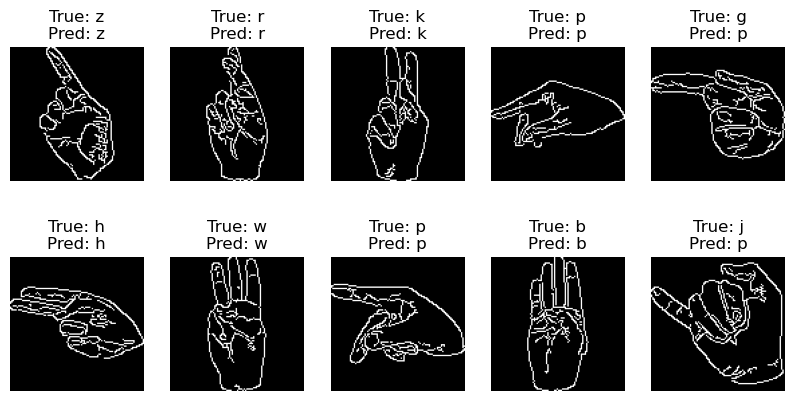

In [10]:
# Show some examples
def show_examples(images, labels, preds=None):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        edge_img = images[i].reshape(IMAGE_SIZE)
        plt.imshow(edge_img, cmap='gray')
        title = f"True: {labels[i]}"
        if preds is not None:
            title += f"\nPred: {preds[i]}"
        plt.title(title)
        plt.axis('off')
    #plt.tight_layout()
    plt.ion()
    plt.show()

show_examples(X_test, y_test, y_pred)

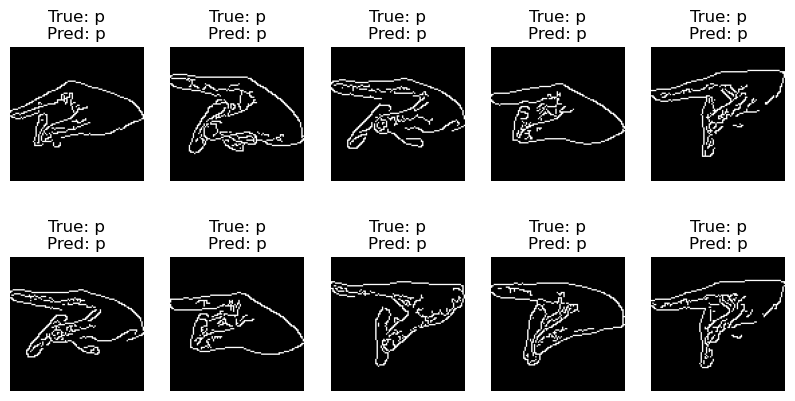

In [11]:
# Pick out indices where y_test is 'P'
indices = [i for i, label in enumerate(y_test) if (label == 'p')]

# Extract images and predictions for these indices
asl_images_p = X_test[indices]
true_labels_p = [y_test[i] for i in indices]
pred_labels_p = [y_pred[i] for i in indices]


show_examples(asl_images_p, true_labels_p, pred_labels_p)

Loading images from: C:\Users\rbecc\OneDrive\Documents\GitHub\asl_dataset\asl_dataset
Found 1815 images.
Extracting features from image 1/1815: hand1_a_bot_seg_1_cropped.jpeg
Extracting features from image 2/1815: hand1_a_bot_seg_2_cropped.jpeg
Extracting features from image 3/1815: hand1_a_bot_seg_3_cropped.jpeg
Extracting features from image 4/1815: hand1_a_bot_seg_4_cropped.jpeg
Extracting features from image 5/1815: hand1_a_bot_seg_5_cropped.jpeg
Extracting features from image 6/1815: hand1_a_dif_seg_1_cropped.jpeg
Extracting features from image 7/1815: hand1_a_dif_seg_2_cropped.jpeg
Extracting features from image 8/1815: hand1_a_dif_seg_3_cropped.jpeg
Extracting features from image 9/1815: hand1_a_dif_seg_4_cropped.jpeg
Extracting features from image 10/1815: hand1_a_dif_seg_5_cropped.jpeg
Extracting features from image 11/1815: hand1_a_left_seg_1_cropped.jpeg
Extracting features from image 12/1815: hand1_a_left_seg_2_cropped.jpeg
Extracting features from image 13/1815: hand1_a_le

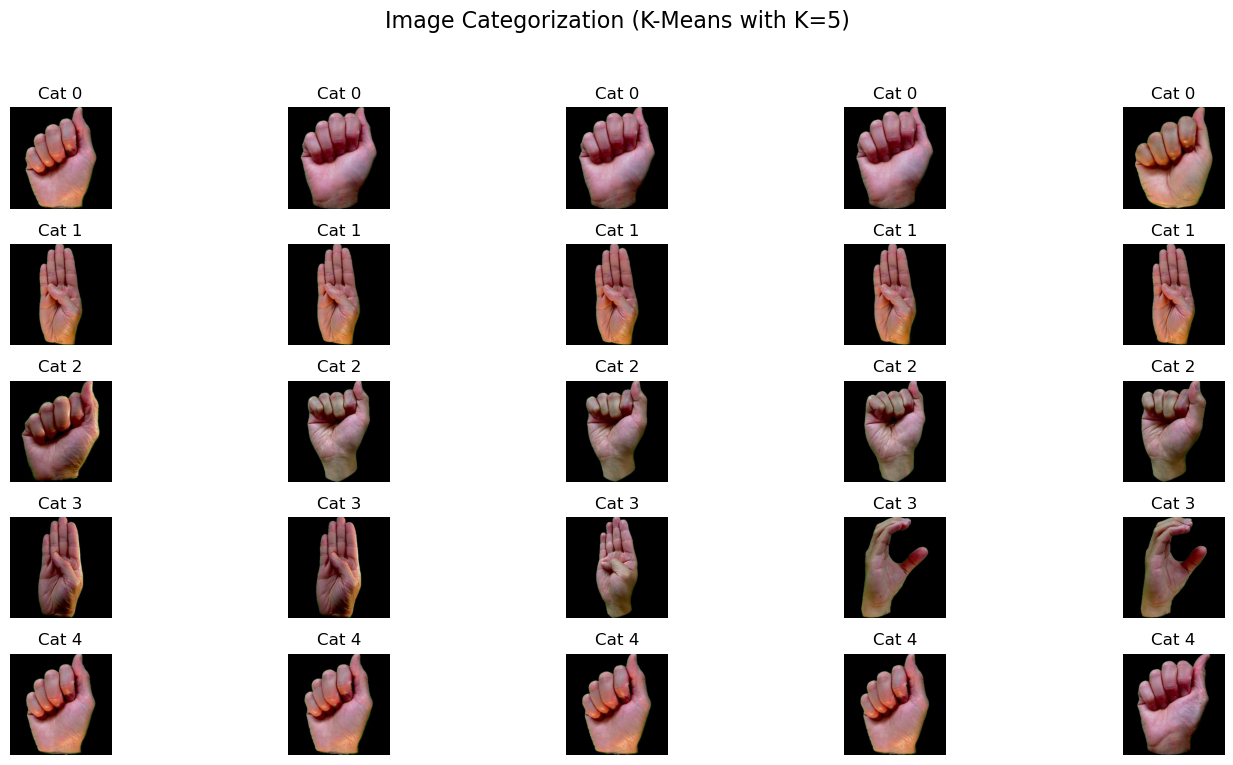


Category Distribution:
Category 0: 167 images
Category 1: 493 images
Category 2: 348 images
Category 3: 394 images
Category 4: 413 images


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io, img_as_float
import os
from glob import glob
from PIL import Image # For image resizing

# --- Configuration ---
#DATASET_PATH = 'path/to/your/image_dataset' # <--- IMPORTANT: Change this!
#IMAGE_SIZE = (64, 64) # Smaller size for faster average color calculation
N_CATEGORIES = 5 # <--- IMPORTANT: Choose the number of categories you expect/want
                    # This is your 'K' for K-Means

# --- Helper function to load and preprocess a single image for feature extraction ---
def load_and_preprocess_image_for_features(image_path, target_size):
    try:
        img = io.imread(image_path)
        img = img_as_float(img) # Convert to float [0, 1]

        # Ensure image has 3 channels (RGB)
        if img.ndim == 2: # Grayscale image
            img = np.stack([img, img, img], axis=-1)
        elif img.shape[-1] == 4: # RGBA image
            img = img[..., :3] # Discard alpha channel

        # Resize the image for consistent feature calculation
        img_pil = Image.fromarray((img * 255).astype(np.uint8))
        img_pil = img_pil.resize(target_size)
        img = np.array(img_pil) / 255.0

        return img
    except Exception as e:
        print(f"Error loading/processing image {image_path}: {e}")
        return None

# --- Feature Extraction: Average Color ---
def extract_average_color(image_array):
    """Calculates the average R, G, B values for an image."""
    # image_array is (height, width, channels)
    return image_array.mean(axis=(0, 1)) # Mean across height and width dimensions

# --- Main Logic for loading dataset, extracting features, and categorizing ---

# List to store features (e.g., average color vector) for each image
image_features = []
image_paths = [] # To keep track of which image belongs to which feature vector

print(f"Loading images from: {DATASET_PATH}")

image_files = []
for ext in ['jpg', 'jpeg', 'png', 'bmp', 'tiff']:
    image_files.extend(glob(os.path.join(DATASET_PATH, '**', f'*.{ext}'), recursive=True))

if not image_files:
    print(f"No images found in {DATASET_PATH}. Please check the path and file types.")
else:
    print(f"Found {len(image_files)} images.")
    for i, img_path in enumerate(image_files):
        # Only process a subset for faster demonstration if you have many images
        # if i > 500: # Limit for testing
        #     break

        print(f"Extracting features from image {i+1}/{len(image_files)}: {os.path.basename(img_path)}")
        processed_img = load_and_preprocess_image_for_features(img_path, IMAGE_SIZE)
        if processed_img is not None:
            feature_vector = extract_average_color(processed_img)
            image_features.append(feature_vector)
            image_paths.append(img_path)

    # Convert features to a NumPy array for K-Means
    X_features = np.array(image_features)
    print(f"\nExtracted features for {X_features.shape[0]} images. Each feature vector has {X_features.shape[1]} dimensions.")

    # 2. Apply K-Means to the feature vectors
    print(f"Applying K-Means to categorize images into {N_CATEGORIES} groups...")
    kmeans = KMeans(n_clusters=N_CATEGORIES, random_state=42, n_init='auto')
    kmeans.fit(X_features)

    # Get the cluster labels for each image
    image_cluster_labels = kmeans.labels_
    # Get the centroids of the clusters (average feature vector for each category)
    category_centroids = kmeans.cluster_centers_

    # 3. Interpret and Visualize Categories
    print("\n--- Image Categorization Results ---")
    category_images = [[] for _ in range(N_CATEGORIES)] # To store image paths per category

    for i, label in enumerate(image_cluster_labels):
        category_images[label].append(image_paths[i])

    # Plotting representative images from each category
    plt.figure(figsize=(15, 8))
    for category_id in range(N_CATEGORIES):
        print(f"\nCategory {category_id} (Centroid RGB: {category_centroids[category_id][0]:.2f}, {category_centroids[category_id][1]:.2f}, {category_centroids[category_id][2]:.2f}):")
        print(f"  Contains {len(category_images[category_id])} images.")
        
        # Display up to 5 sample images from each category
        num_samples_to_show = min(5, len(category_images[category_id]))
        for i in range(num_samples_to_show):
            ax = plt.subplot(N_CATEGORIES, 5, category_id * 5 + i + 1)
            img_path = category_images[category_id][i]
            img = io.imread(img_path)
            plt.imshow(img)
            plt.title(f'Cat {category_id}')
            plt.axis('off')

    plt.suptitle(f'Image Categorization (K-Means with K={N_CATEGORIES})', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()

    # If you want to see the distribution of images per category:
    unique_labels, counts = np.unique(image_cluster_labels, return_counts=True)
    print("\nCategory Distribution:")
    for label, count in zip(unique_labels, counts):
        print(f"Category {label}: {count} images")

#else:
#    print("No images were loaded for categorization.")

Loading images...
Applying K-Means to categorize images into 5 groups...

--- Image Categorization Results ---

Category 0 (Centroid RGB: 0.00, 0.00, 0.00):
  Contains 3 images.

Category 1 (Centroid RGB: 0.00, 4.13, 6.36):
  Contains 802 images.

Category 2 (Centroid RGB: 0.00, 0.00, -0.00):
  Contains 708 images.

Category 3 (Centroid RGB: 0.00, 0.00, 0.89):
  Contains 287 images.

Category 4 (Centroid RGB: 0.00, 0.00, 0.00):
  Contains 15 images.


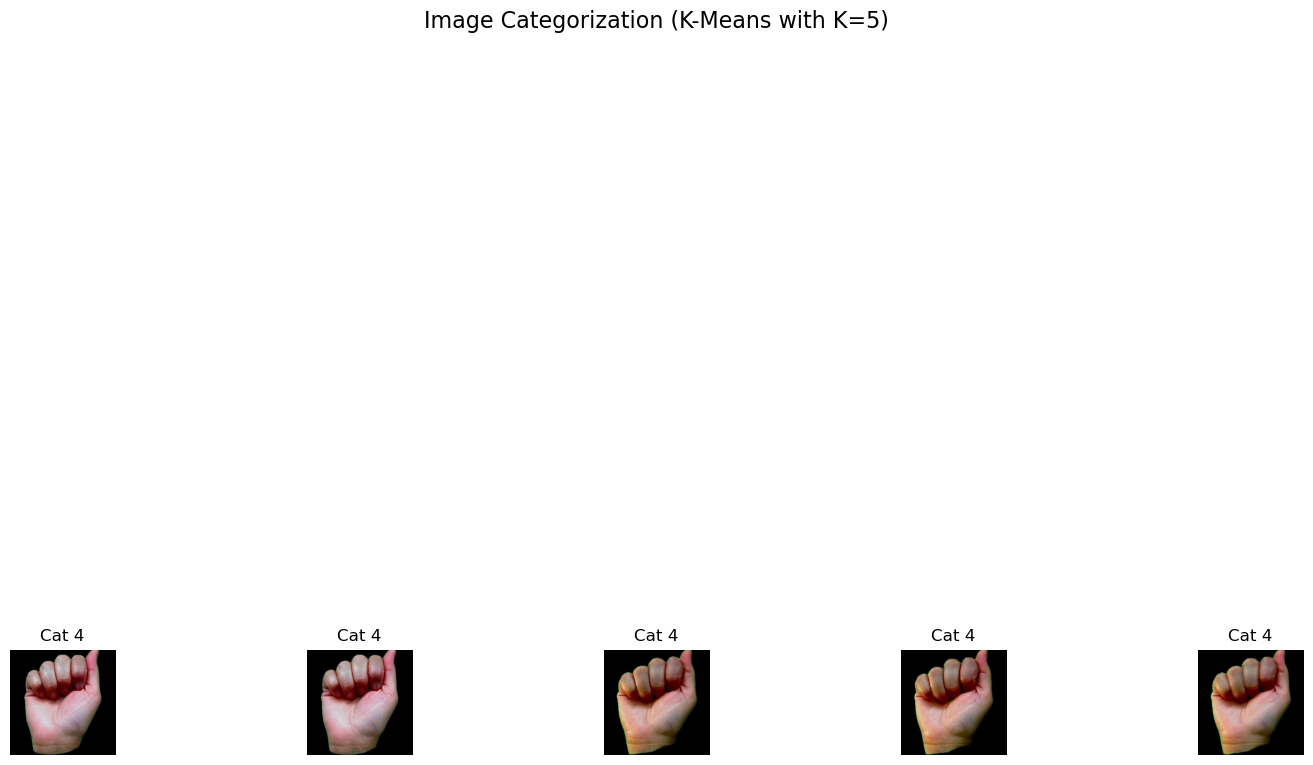


Category Distribution:
Category 0: 3 images
Category 1: 802 images
Category 2: 708 images
Category 3: 287 images
Category 4: 15 images


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io, img_as_float
import os
from glob import glob
from PIL import Image # For image resizing

# --- Configuration ---
#DATASET_PATH = 'path/to/your/image_dataset' # <--- IMPORTANT: Change this!
#IMAGE_SIZE = (64, 64) # Smaller size for faster average color calculation
N_CATEGORIES = 5 # <--- IMPORTANT: Choose the number of categories you expect/want

# 1. IMAGE_SIZE = (100, 100)

def load_images_and_labels(dataset_path):
    X = []
    y = []
    for label in sorted(os.listdir(dataset_path)):
        label_path = os.path.join(dataset_path, label)
        if not os.path.isdir(label_path):
            continue
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, IMAGE_SIZE)
            edges = cv2.Canny(img, 100, 200)
            X.append(edges.flatten())
            y.append(label)
    return np.array(X), np.array(y)

# Load data
print("Loading images...")
X, y = load_images_and_labels(DATASET_PATH)

# 2. Apply K-Means to the feature vectors
print(f"Applying K-Means to categorize images into {N_CATEGORIES} groups...")
kmeans = KMeans(n_clusters=N_CATEGORIES, random_state=42, n_init='auto')
kmeans.fit(X)

# Get the cluster labels for each image
image_cluster_labels = kmeans.labels_
# Get the centroids of the clusters (average feature vector for each category)
category_centroids = kmeans.cluster_centers_

# 3. Interpret and Visualize Categories
print("\n--- Image Categorization Results ---")
category_images = [[] for _ in range(N_CATEGORIES)] # To store image paths per category

for i, label in enumerate(image_cluster_labels):
    category_images[label].append(image_paths[i])

# Plotting representative images from each category
plt.figure(figsize=(15, 8))
for category_id in range(N_CATEGORIES):
    print(f"\nCategory {category_id} (Centroid RGB: {category_centroids[category_id][0]:.2f}, {category_centroids[category_id][1]:.2f}, {category_centroids[category_id][2]:.2f}):")
    print(f"  Contains {len(category_images[category_id])} images.")
        
# Display up to 5 sample images from each category
num_samples_to_show = min(5, len(category_images[category_id]))
for i in range(num_samples_to_show):
    ax = plt.subplot(N_CATEGORIES, 5, category_id * 5 + i + 1)
    img_path = category_images[category_id][i]
    img = io.imread(img_path)
    plt.imshow(img)
    plt.title(f'Cat {category_id}')
    plt.axis('off')

plt.suptitle(f'Image Categorization (K-Means with K={N_CATEGORIES})', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# If you want to see the distribution of images per category:
unique_labels, counts = np.unique(image_cluster_labels, return_counts=True)
print("\nCategory Distribution:")
for label, count in zip(unique_labels, counts):
    print(f"Category {label}: {count} images")

#else:
#    print("No images were loaded for categorization.")